Import Libraries....

In [55]:
 import pandas as pd
 import numpy as np
 import matplotlib.pyplot as plt
 import seaborn as sns
 import matplotlib.pyplot as plt

Load Data.....

In [56]:
df = pd.read_csv('/content/ncr_ride_bookings.csv')

Basic Info.....

In [58]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 21 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Date                               150000 non-null  object 
 1   Time                               150000 non-null  object 
 2   Booking ID                         150000 non-null  object 
 3   Booking Status                     150000 non-null  object 
 4   Customer ID                        150000 non-null  object 
 5   Vehicle Type                       150000 non-null  object 
 6   Pickup Location                    150000 non-null  object 
 7   Drop Location                      150000 non-null  object 
 8   Avg VTAT                           139500 non-null  float64
 9   Avg CTAT                           102000 non-null  float64
 10  Cancelled Rides by Customer        10500 non-null   float64
 11  Reason for cancelling by Customer  1050

In [59]:
print(df.head())

         Date      Time    Booking ID   Booking Status   Customer ID  \
0  2024-03-23  12:29:38  "CNR5884300"  No Driver Found  "CID1982111"   
1  2024-11-29  18:01:39  "CNR1326809"       Incomplete  "CID4604802"   
2  2024-08-23  08:56:10  "CNR8494506"        Completed  "CID9202816"   
3  2024-10-21  17:17:25  "CNR8906825"        Completed  "CID2610914"   
4  2024-09-16  22:08:00  "CNR1950162"        Completed  "CID9933542"   

    Vehicle Type      Pickup Location      Drop Location  Avg VTAT  Avg CTAT  \
0          eBike          Palam Vihar            Jhilmil       NaN       NaN   
1       Go Sedan        Shastri Nagar  Gurgaon Sector 56       4.9      14.0   
2           Auto              Khandsa      Malviya Nagar      13.4      25.8   
3  Premier Sedan  Central Secretariat           Inderlok      13.1      28.5   
4           Bike     Ghitorni Village        Khan Market       5.3      19.6   

   ...  Reason for cancelling by Customer Cancelled Rides by Driver  \
0  ...         

Convert Date and Time to DateTime...

In [62]:
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M%S', errors= 'coerce').dt.time
display(df[['Date', 'Time']].head())

,Date,Time
0,2024-03-23,NaT
1,2024-11-29,NaT
2,2024-08-23,NaT
3,2024-10-21,NaT
4,2024-09-16,NaT


Handle Missing Values..

1--- Fill numeric missing with median

In [ ]:
numeric_cols = ['Avg VTAT', 'Avg CTAT', 'Booking Value', 'Ride Distance', 'Driver Ratings', 'Customer Rating']
for col in numeric_cols:
    df[col] = df[col].fillna(df[col].median())

Fill Payment Method Missing with Unknown

In [ ]:
df['Payment Method'] = df['Payment Method'].fillna('Unknown')
display(df['Payment Method'].head())

,Payment Method
0,Unknown
1,UPI
2,Debit Card
3,UPI
4,UPI


Fill Bookings status for missings if any ..

In [ ]:
df['Booking Status'] = df['Booking Status'].fillna('Unknown ')
display(df['Booking Status'].value_counts())

,count
Booking Status,
Completed,41966
Cancelled by Driver,12189
No Driver Found,4774
Cancelled by Customer,4740
Incomplete,4083


Drop rows with completely missing Date or Bookings ID

In [ ]:
print("Number of rows before dropping missing 'Date' or 'Booking ID':", len(df))
df = df.dropna(subset=['Date', 'Booking ID'])
print("Number of rows after dropping missing 'Date' or 'Booking ID':", len(df))

Number of rows before dropping missing 'Date' or 'Booking ID': 67752
Number of rows after dropping missing 'Date' or 'Booking ID': 67752


Remove Duplicates..

In [ ]:
print("Number of rows before dropping duplicates:", len(df))
df.drop_duplicates(inplace=True)
print("Number of rows after dropping duplicates:", len(df))

Number of rows before dropping duplicates: 67752
Number of rows after dropping duplicates: 67752


Create Additonal Columns For Analysis..

In [ ]:
df['Month'] = df['Date'].dt.month
df['Day'] = df['Date'].dt.day
df['Day of Week'] = df['Date'].dt.day_name()
display(df.head())

,Date,Time,Booking ID,Booking Status,Customer ID,Vehicle Type,Pickup Location,Drop Location,Avg VTAT,Avg CTAT,...,Incomplete Rides,Incomplete Rides Reason,Booking Value,Ride Distance,Driver Ratings,Customer Rating,Payment Method,Month,Day,Day of Week
0,2024-03-23,NaT,"""CNR5884300""",No Driver Found,"""CID1982111""",eBike,Palam Vihar,Jhilmil,8.2,28.7,...,NaN,NaN,415.0,23.79,4.3,4.4,Unknown,3,23,Saturday
1,2024-11-29,NaT,"""CNR1326809""",Incomplete,"""CID4604802""",Go Sedan,Shastri Nagar,Gurgaon Sector 56,4.9,14.0,...,1.0,Vehicle Breakdown,237.0,5.73,4.3,4.4,UPI,11,29,Friday
2,2024-08-23,NaT,"""CNR8494506""",Completed,"""CID9202816""",Auto,Khandsa,Malviya Nagar,13.4,25.8,...,NaN,NaN,627.0,13.58,4.9,4.9,Debit Card,8,23,Friday
3,2024-10-21,NaT,"""CNR8906825""",Completed,"""CID2610914""",Premier Sedan,Central Secretariat,Inderlok,13.1,28.5,...,NaN,NaN,416.0,34.02,4.6,5.0,UPI,10,21,Monday
4,2024-09-16,NaT,"""CNR1950162""",Completed,"""CID9933542""",Bike,Ghitorni Village,Khan Market,5.3,19.6,...,NaN,NaN,737.0,48.21,4.1,4.3,UPI,9,16,Monday


Save Cleaned Data

In [ ]:
df.to_csv("/content/ncr_ride_bookings_cleaned.csv", index=False)
print("Cleaning completed! Cleaned file saved as ncr_ride_bookings_cleaned.csv")

Cleaning completed! Cleaned file saved as ncr_ride_bookings_cleaned.csv


EDA (Exploratory Data Analysis Code)

1-- Total Rides per Month..

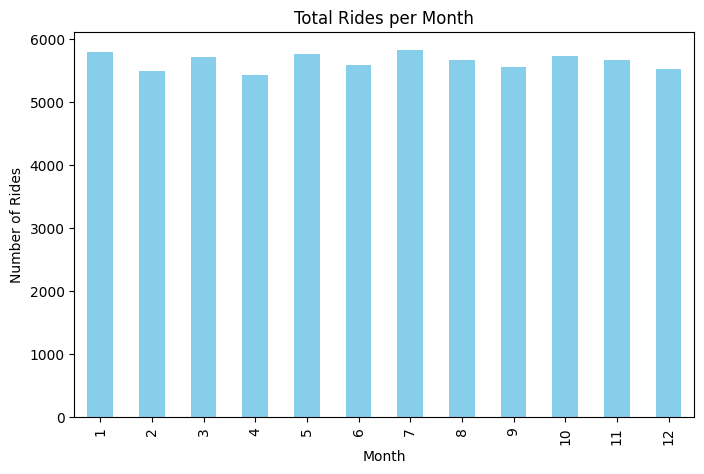

In [ ]:
df = pd.read_csv('/content/ncr_ride_bookings_cleaned.csv')
rides_by_month = df['Month'].value_counts().sort_index()
plt.figure(figsize=(8, 5))
rides_by_month.plot(kind='bar', color='skyblue')
plt.title('Total Rides per Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.show()

Revenue Trend

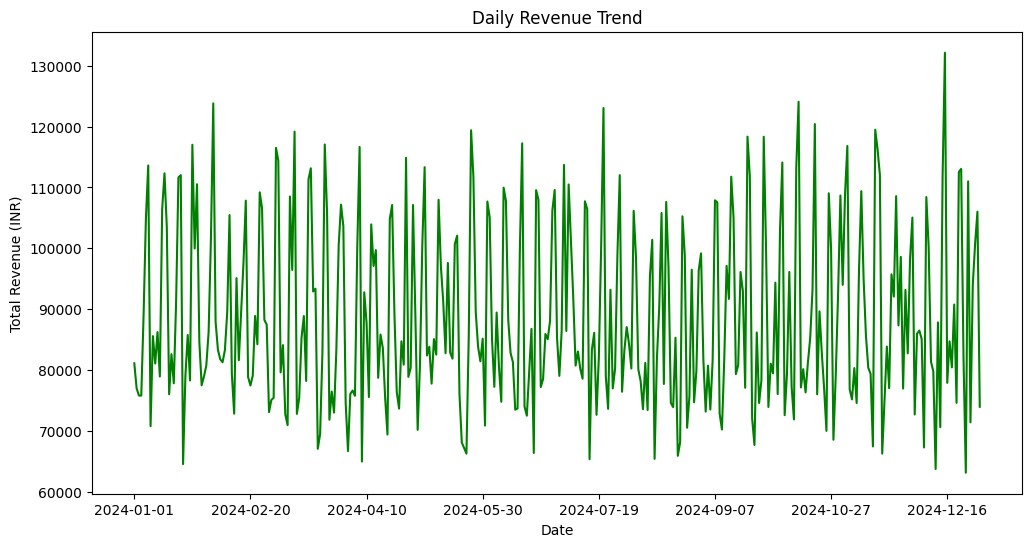

In [ ]:
df = pd.read_csv('/content/ncr_ride_bookings_cleaned.csv')
plt.figure(figsize=(12, 6))
daily_revenue.plot(kind='line', color='green')
plt.title('Daily Revenue Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue (INR)')
plt.show()

Popular Vehicles Types

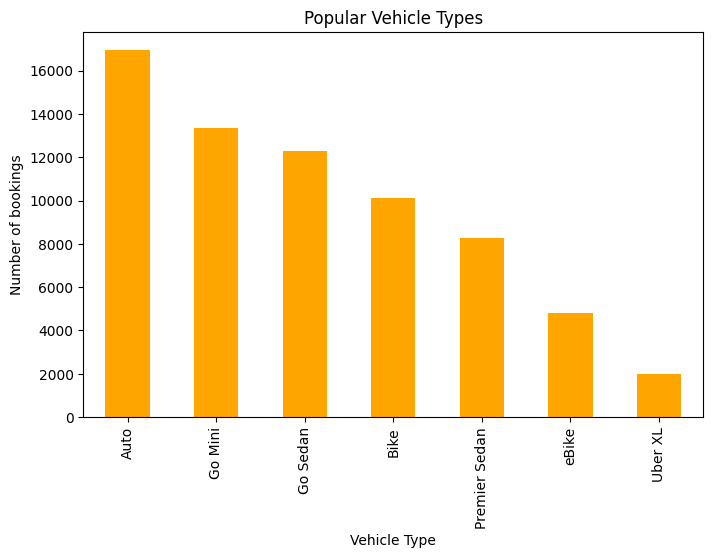

In [ ]:
df = pd.read_csv('/content/ncr_ride_bookings_cleaned.csv')
vehicle_counts = df['Vehicle Type'].value_counts()
plt.figure(figsize=(8, 5))
vehicle_counts.plot(kind='bar', color='orange')
plt.title('Popular Vehicle Types')
plt.xlabel('Vehicle Type')
plt.ylabel('Number of bookings')
plt.show()

Payment Preferences

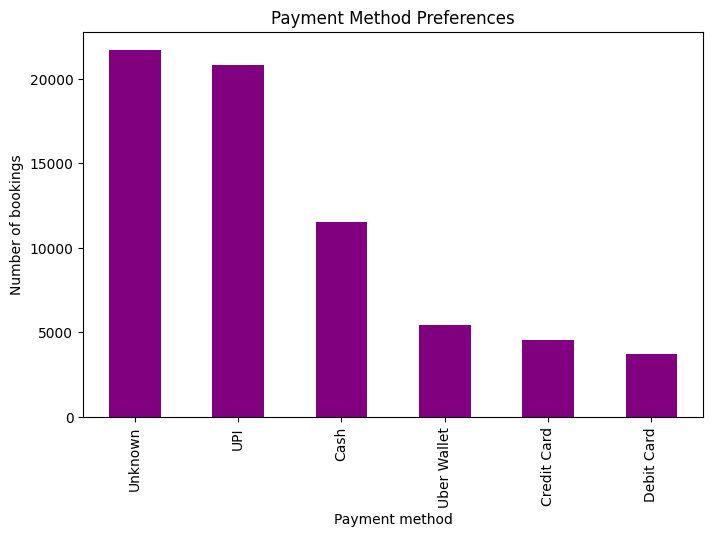

In [ ]:
df = pd.read_csv('/content/ncr_ride_bookings_cleaned.csv')
payment_count = df['Payment Method'].value_counts()
plt.figure(figsize=(8, 5))
payment_count.plot(kind='bar', color='purple')
plt.title('Payment Method Preferences')
plt.xlabel('Payment method')
plt.ylabel('Number of bookings')
plt.show()